##Importing necessary libraries

In [24]:
import pandas as pd
import numpy as np
import datetime
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import linregress
from sklearn.impute import SimpleImputer
from collections import Counter
import scipy.stats as st

##Mounting Drive

In [25]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


##Reading the Dataset

In [26]:
Jan2019 = pd.read_csv('/content/drive/My Drive/Jan_2019_ontime.csv')

In [27]:
Jan2019.shape

(583985, 22)

In [28]:
print(list(Jan2019.columns))

['DAY_OF_MONTH', 'DAY_OF_WEEK', 'OP_UNIQUE_CARRIER', 'OP_CARRIER_AIRLINE_ID', 'OP_CARRIER', 'TAIL_NUM', 'OP_CARRIER_FL_NUM', 'ORIGIN_AIRPORT_ID', 'ORIGIN_AIRPORT_SEQ_ID', 'ORIGIN', 'DEST_AIRPORT_ID', 'DEST_AIRPORT_SEQ_ID', 'DEST', 'DEP_TIME', 'DEP_DEL15', 'DEP_TIME_BLK', 'ARR_TIME', 'ARR_DEL15', 'CANCELLED', 'DIVERTED', 'DISTANCE', 'Unnamed: 21']


In [29]:
Jan2019.head()

,DAY_OF_MONTH,DAY_OF_WEEK,OP_UNIQUE_CARRIER,OP_CARRIER_AIRLINE_ID,OP_CARRIER,TAIL_NUM,OP_CARRIER_FL_NUM,ORIGIN_AIRPORT_ID,ORIGIN_AIRPORT_SEQ_ID,ORIGIN,...,DEST,DEP_TIME,DEP_DEL15,DEP_TIME_BLK,ARR_TIME,ARR_DEL15,CANCELLED,DIVERTED,DISTANCE,Unnamed: 21
0,1,2,9E,20363,9E,N8688C,3280,11953,1195302,GNV,...,ATL,601.0,0.0,0600-0659,722.0,0.0,0.0,0.0,300.0,NaN
1,1,2,9E,20363,9E,N348PQ,3281,13487,1348702,MSP,...,CVG,1359.0,0.0,1400-1459,1633.0,0.0,0.0,0.0,596.0,NaN
2,1,2,9E,20363,9E,N8896A,3282,11433,1143302,DTW,...,CVG,1215.0,0.0,1200-1259,1329.0,0.0,0.0,0.0,229.0,NaN
3,1,2,9E,20363,9E,N8886A,3283,15249,1524906,TLH,...,ATL,1521.0,0.0,1500-1559,1625.0,0.0,0.0,0.0,223.0,NaN
4,1,2,9E,20363,9E,N8974C,3284,10397,1039707,ATL,...,FSM,1847.0,0.0,1900-1959,1940.0,0.0,0.0,0.0,579.0,NaN


In [30]:
df = Jan2019.copy()

<h3>Dropping an extra column

In [31]:
Jan2019.drop('Unnamed: 21',axis = 1,inplace = True)

##NA Values checking

In [32]:
Jan2019.isnull().sum()

DAY_OF_MONTH                 0
DAY_OF_WEEK                  0
OP_UNIQUE_CARRIER            0
OP_CARRIER_AIRLINE_ID        0
OP_CARRIER                   0
TAIL_NUM                  2543
OP_CARRIER_FL_NUM            0
ORIGIN_AIRPORT_ID            0
ORIGIN_AIRPORT_SEQ_ID        0
ORIGIN                       0
DEST_AIRPORT_ID              0
DEST_AIRPORT_SEQ_ID          0
DEST                         0
DEP_TIME                 16352
DEP_DEL15                16355
DEP_TIME_BLK                 0
ARR_TIME                 17061
ARR_DEL15                18022
CANCELLED                    0
DIVERTED                     0
DISTANCE                     0
dtype: int64

In [33]:
Jan2019.dtypes

DAY_OF_MONTH               int64
DAY_OF_WEEK                int64
OP_UNIQUE_CARRIER         object
OP_CARRIER_AIRLINE_ID      int64
OP_CARRIER                object
TAIL_NUM                  object
OP_CARRIER_FL_NUM          int64
ORIGIN_AIRPORT_ID          int64
ORIGIN_AIRPORT_SEQ_ID      int64
ORIGIN                    object
DEST_AIRPORT_ID            int64
DEST_AIRPORT_SEQ_ID        int64
DEST                      object
DEP_TIME                 float64
DEP_DEL15                float64
DEP_TIME_BLK              object
ARR_TIME                 float64
ARR_DEL15                float64
CANCELLED                float64
DIVERTED                 float64
DISTANCE                 float64
dtype: object

<h2>Filling NA values in ARR_DEL15 and ARR_TIME column

In [34]:
Jan2019['ARR_DEL15'] = Jan2019['ARR_DEL15'].fillna(method = 'ffill')
Jan2019['ARR_TIME'] = Jan2019['ARR_TIME'].fillna(method = 'ffill')

In [35]:
Jan2019['ARR_DEL15'].isnull().sum()
Jan2019['ARR_TIME'].isnull().sum()

0

<h2>Filling NA values in DEP_DEL15 column

In [36]:
Jan2019['DEP_DEL15'] = Jan2019['DEP_DEL15'].fillna(method = 'ffill')
Jan2019['DEP_TIME'] = Jan2019['DEP_TIME'].fillna(method = 'ffill')

In [37]:
Jan2019.drop('OP_CARRIER',axis = 1,inplace = True)
Jan2019.drop('OP_CARRIER_AIRLINE_ID',axis = 1,inplace = True)
Jan2019.drop('TAIL_NUM',axis = 1,inplace = True)

In [38]:
Jan2019['DEP_DEL15'].isnull().sum()
Jan2019['DEP_TIME'].isnull().sum()

0

In [39]:
Jan2019['DATE'] = pd.to_datetime('2019-01-' + Jan2019['DAY_OF_MONTH'].apply(str))
Jan2019['DAY_NAME'] = Jan2019['DATE'].dt.day_name()
Jan2019.head()

,DAY_OF_MONTH,DAY_OF_WEEK,OP_UNIQUE_CARRIER,OP_CARRIER_FL_NUM,ORIGIN_AIRPORT_ID,ORIGIN_AIRPORT_SEQ_ID,ORIGIN,DEST_AIRPORT_ID,DEST_AIRPORT_SEQ_ID,DEST,DEP_TIME,DEP_DEL15,DEP_TIME_BLK,ARR_TIME,ARR_DEL15,CANCELLED,DIVERTED,DISTANCE,DATE,DAY_NAME
0,1,2,9E,3280,11953,1195302,GNV,10397,1039707,ATL,601.0,0.0,0600-0659,722.0,0.0,0.0,0.0,300.0,2019-01-01,Tuesday
1,1,2,9E,3281,13487,1348702,MSP,11193,1119302,CVG,1359.0,0.0,1400-1459,1633.0,0.0,0.0,0.0,596.0,2019-01-01,Tuesday
2,1,2,9E,3282,11433,1143302,DTW,11193,1119302,CVG,1215.0,0.0,1200-1259,1329.0,0.0,0.0,0.0,229.0,2019-01-01,Tuesday
3,1,2,9E,3283,15249,1524906,TLH,10397,1039707,ATL,1521.0,0.0,1500-1559,1625.0,0.0,0.0,0.0,223.0,2019-01-01,Tuesday
4,1,2,9E,3284,10397,1039707,ATL,11778,1177801,FSM,1847.0,0.0,1900-1959,1940.0,0.0,0.0,0.0,579.0,2019-01-01,Tuesday


#Correleation Computation

In [40]:
CJan2019 = Jan2019.copy()
CJan2019.columns

Index(['DAY_OF_MONTH', 'DAY_OF_WEEK', 'OP_UNIQUE_CARRIER', 'OP_CARRIER_FL_NUM',
       'ORIGIN_AIRPORT_ID', 'ORIGIN_AIRPORT_SEQ_ID', 'ORIGIN',
       'DEST_AIRPORT_ID', 'DEST_AIRPORT_SEQ_ID', 'DEST', 'DEP_TIME',
       'DEP_DEL15', 'DEP_TIME_BLK', 'ARR_TIME', 'ARR_DEL15', 'CANCELLED',
       'DIVERTED', 'DISTANCE', 'DATE', 'DAY_NAME'],
      dtype='object')

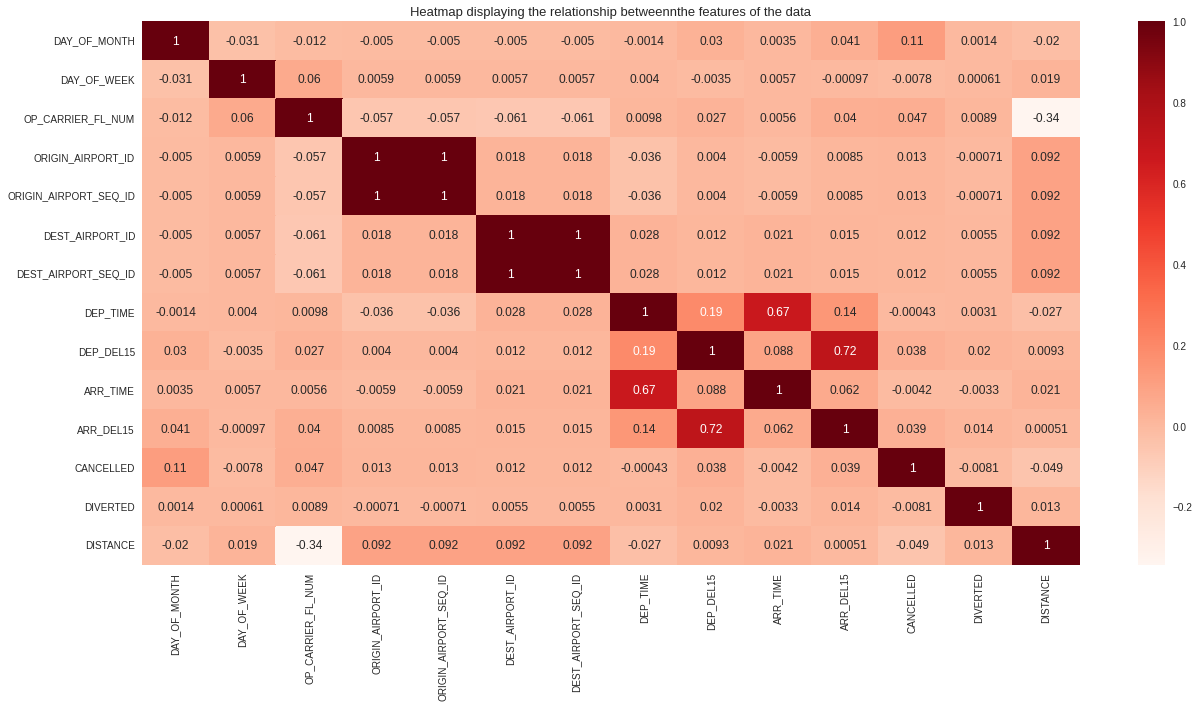

In [41]:
plt.figure(figsize=(21,10))
sns.heatmap(CJan2019.corr(),cmap=plt.cm.Reds,annot=True)
plt.title('Heatmap displaying the relationship betweennthe features of the data',
         fontsize=13)
plt.show()

In [42]:
CJan2019.corr()['ARR_DEL15']

DAY_OF_MONTH             0.040678
DAY_OF_WEEK             -0.000972
OP_CARRIER_FL_NUM        0.040053
ORIGIN_AIRPORT_ID        0.008534
ORIGIN_AIRPORT_SEQ_ID    0.008534
DEST_AIRPORT_ID          0.015114
DEST_AIRPORT_SEQ_ID      0.015114
DEP_TIME                 0.143771
DEP_DEL15                0.718037
ARR_TIME                 0.061861
ARR_DEL15                1.000000
CANCELLED                0.038651
DIVERTED                 0.014072
DISTANCE                 0.000509
Name: ARR_DEL15, dtype: float64

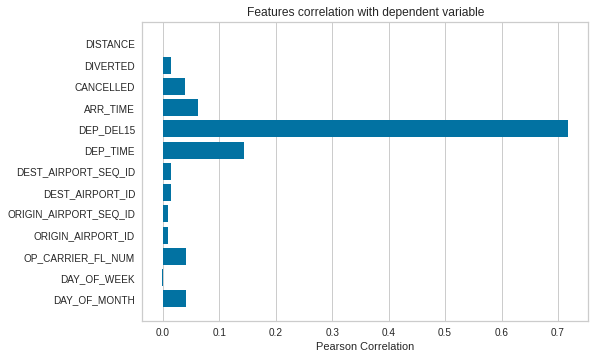

In [43]:
columns=['DAY_OF_MONTH','DAY_OF_WEEK','OP_CARRIER_FL_NUM','ORIGIN_AIRPORT_ID','ORIGIN_AIRPORT_SEQ_ID','DEST_AIRPORT_ID',
         'DEST_AIRPORT_SEQ_ID','DEP_TIME','DEP_DEL15','ARR_TIME','CANCELLED','DIVERTED','DISTANCE','ARR_DEL15']
X = CJan2019[columns].drop('ARR_DEL15', axis = 1)
Y = CJan2019['ARR_DEL15']
from yellowbrick.target.feature_correlation import feature_correlation
feature_correlation(X, Y);

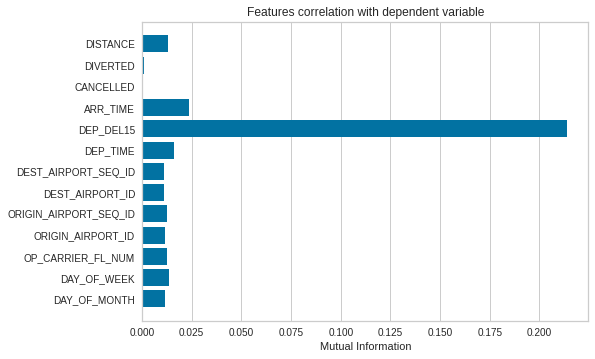

In [44]:
feature_correlation(X, Y, method='mutual_info-classification');

# Bi-Variate,Multi Variate Analysis

Text(0.5, 1.0, 'DIVERTED')

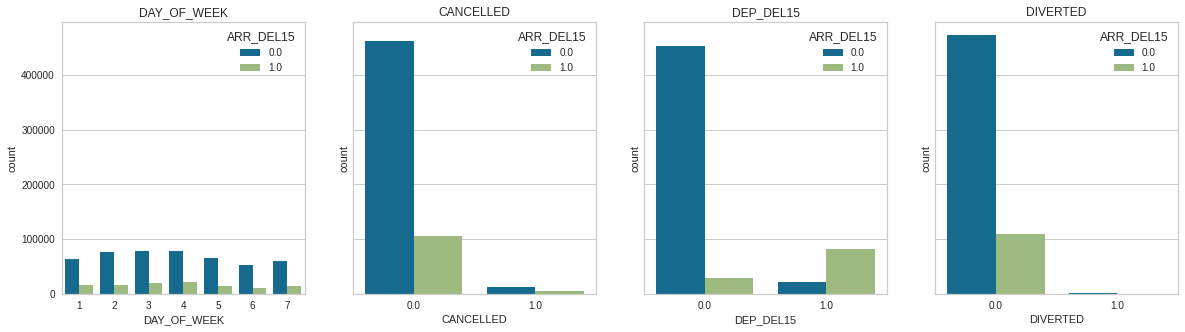

In [45]:
fig, axes = plt.subplots(1, 4, figsize=(20, 5), sharey=True)

sns.countplot(ax=axes[0], x='DAY_OF_WEEK', hue='ARR_DEL15',data=CJan2019)
axes[0].set_title('DAY_OF_WEEK')


sns.countplot(ax=axes[1], x='CANCELLED', hue='ARR_DEL15',data=CJan2019)
axes[1].set_title('CANCELLED')

sns.countplot(ax=axes[2], x='DEP_DEL15', hue='ARR_DEL15',data=CJan2019)
axes[2].set_title('DEP_DEL15')

sns.countplot(ax=axes[3], x='DIVERTED', hue='ARR_DEL15',data=CJan2019)
axes[3].set_title('DIVERTED')

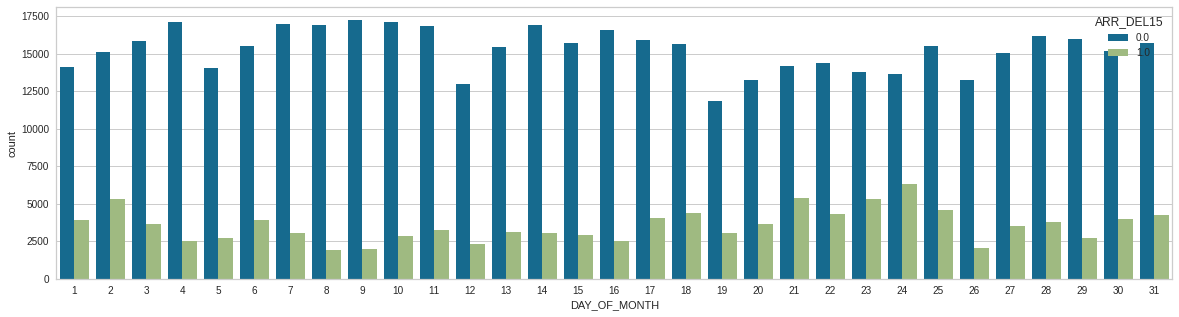

In [46]:
plt.figure(figsize=(20,5))
sns.countplot(x='DAY_OF_MONTH', hue='ARR_DEL15',data=CJan2019)

Text(0.5, 1.0, 'DIVERTED')

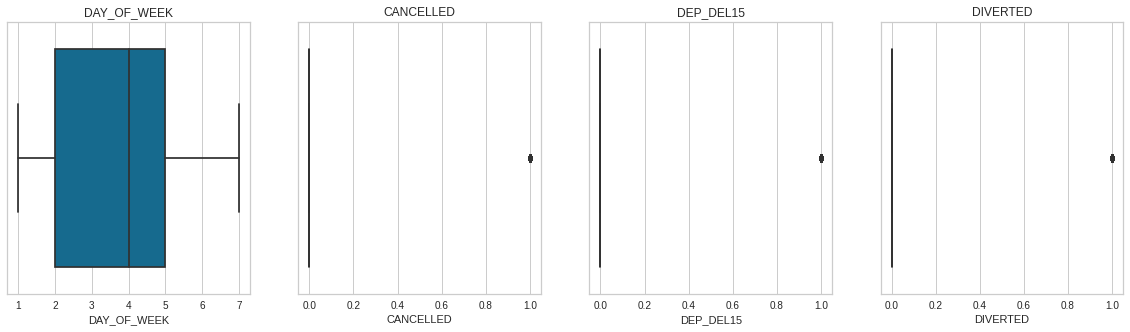

In [47]:
fig, axes = plt.subplots(1, 4, figsize=(20, 5), sharey=True)

sns.boxplot(ax=axes[0], x='DAY_OF_WEEK', hue='ARR_DEL15',data=CJan2019)
axes[0].set_title('DAY_OF_WEEK')


sns.boxplot(ax=axes[1], x='CANCELLED', hue='ARR_DEL15',data=CJan2019)
axes[1].set_title('CANCELLED')

sns.boxplot(ax=axes[2], x='DEP_DEL15', hue='ARR_DEL15',data=CJan2019)
axes[2].set_title('DEP_DEL15')

sns.boxplot(ax=axes[3], x='DIVERTED', hue='ARR_DEL15',data=CJan2019)
axes[3].set_title('DIVERTED')

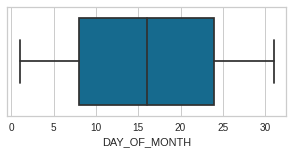

In [48]:
plt.figure(figsize=(5,2))
sns.boxplot(x='DAY_OF_MONTH', hue='ARR_DEL15',data=CJan2019)

Text(0.5, 1.0, 'DIVERTED VS CANCELLED')

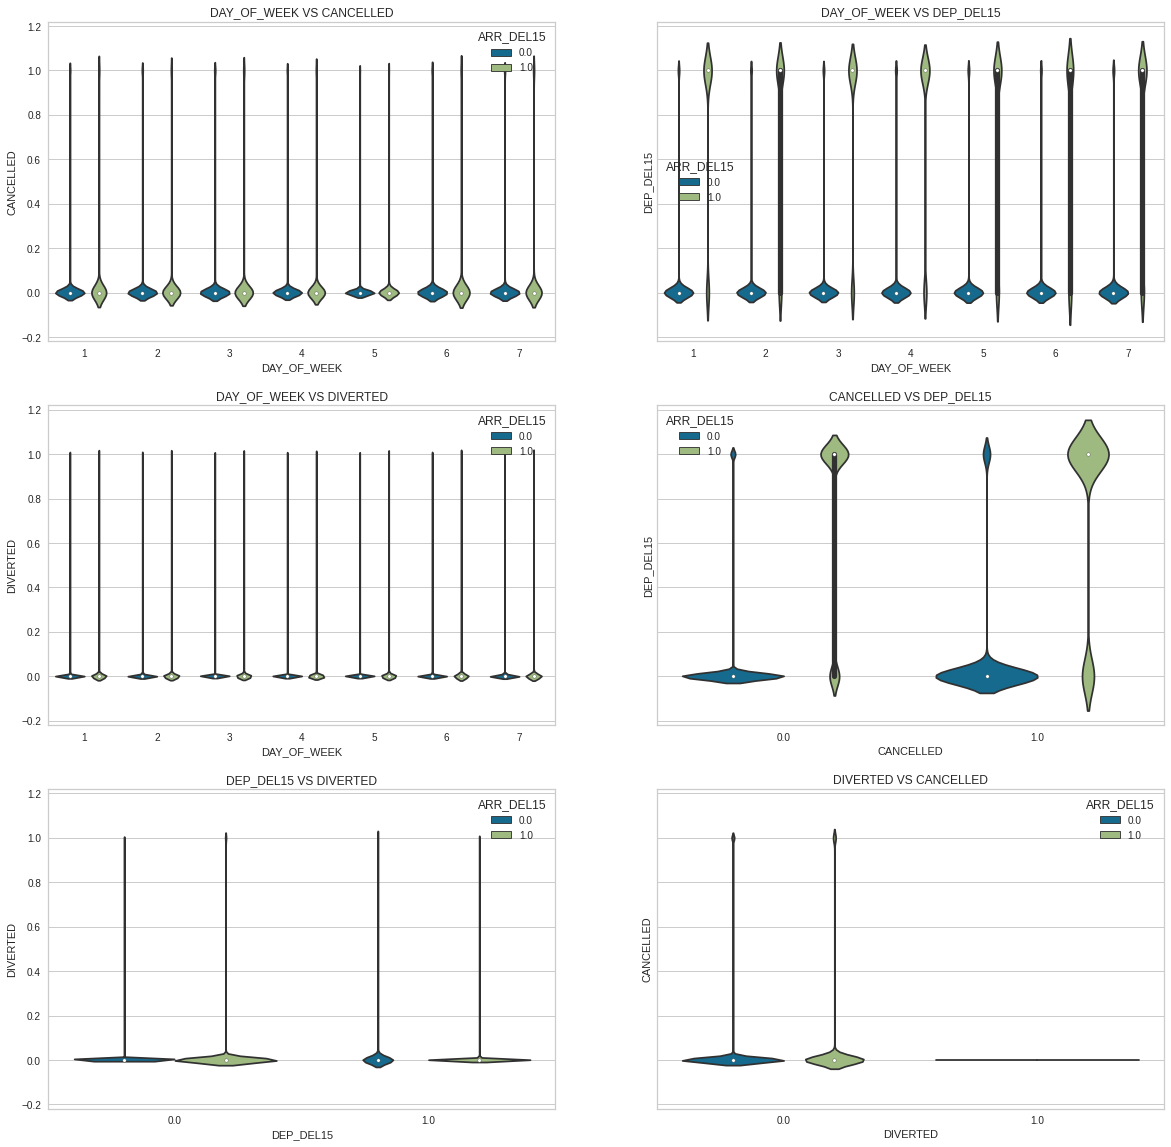

In [49]:
fig, axes = plt.subplots(3,2,figsize=(20, 20), sharey=True)

sns.violinplot(ax=axes[0,0], x='DAY_OF_WEEK',y='CANCELLED', hue='ARR_DEL15',data=CJan2019)
axes[0,0].set_title('DAY_OF_WEEK VS CANCELLED')

sns.violinplot(ax=axes[0,1], x='DAY_OF_WEEK',y='DEP_DEL15', hue='ARR_DEL15',data=CJan2019)
axes[0,1].set_title('DAY_OF_WEEK VS DEP_DEL15')

sns.violinplot(ax=axes[1,0], x='DAY_OF_WEEK',y='DIVERTED', hue='ARR_DEL15',data=CJan2019)
axes[1,0].set_title('DAY_OF_WEEK VS DIVERTED')

sns.violinplot(ax=axes[1,1], x='CANCELLED',y='DEP_DEL15', hue='ARR_DEL15',data=CJan2019)
axes[1,1].set_title('CANCELLED VS DEP_DEL15')

sns.violinplot(ax=axes[2,0], x='DEP_DEL15',y='DIVERTED', hue='ARR_DEL15',data=CJan2019)
axes[2,0].set_title('DEP_DEL15 VS DIVERTED')

sns.violinplot(ax=axes[2,1], x='DIVERTED',y='CANCELLED', hue='ARR_DEL15',data=CJan2019)
axes[2,1].set_title('DIVERTED VS CANCELLED')

In [50]:
# columns=[]
columns=['DEP_DEL15','DISTANCE','CANCELLED','DIVERTED','DAY_OF_MONTH','DAY_OF_WEEK','DEP_TIME','ARR_TIME','ARR_DEL15']

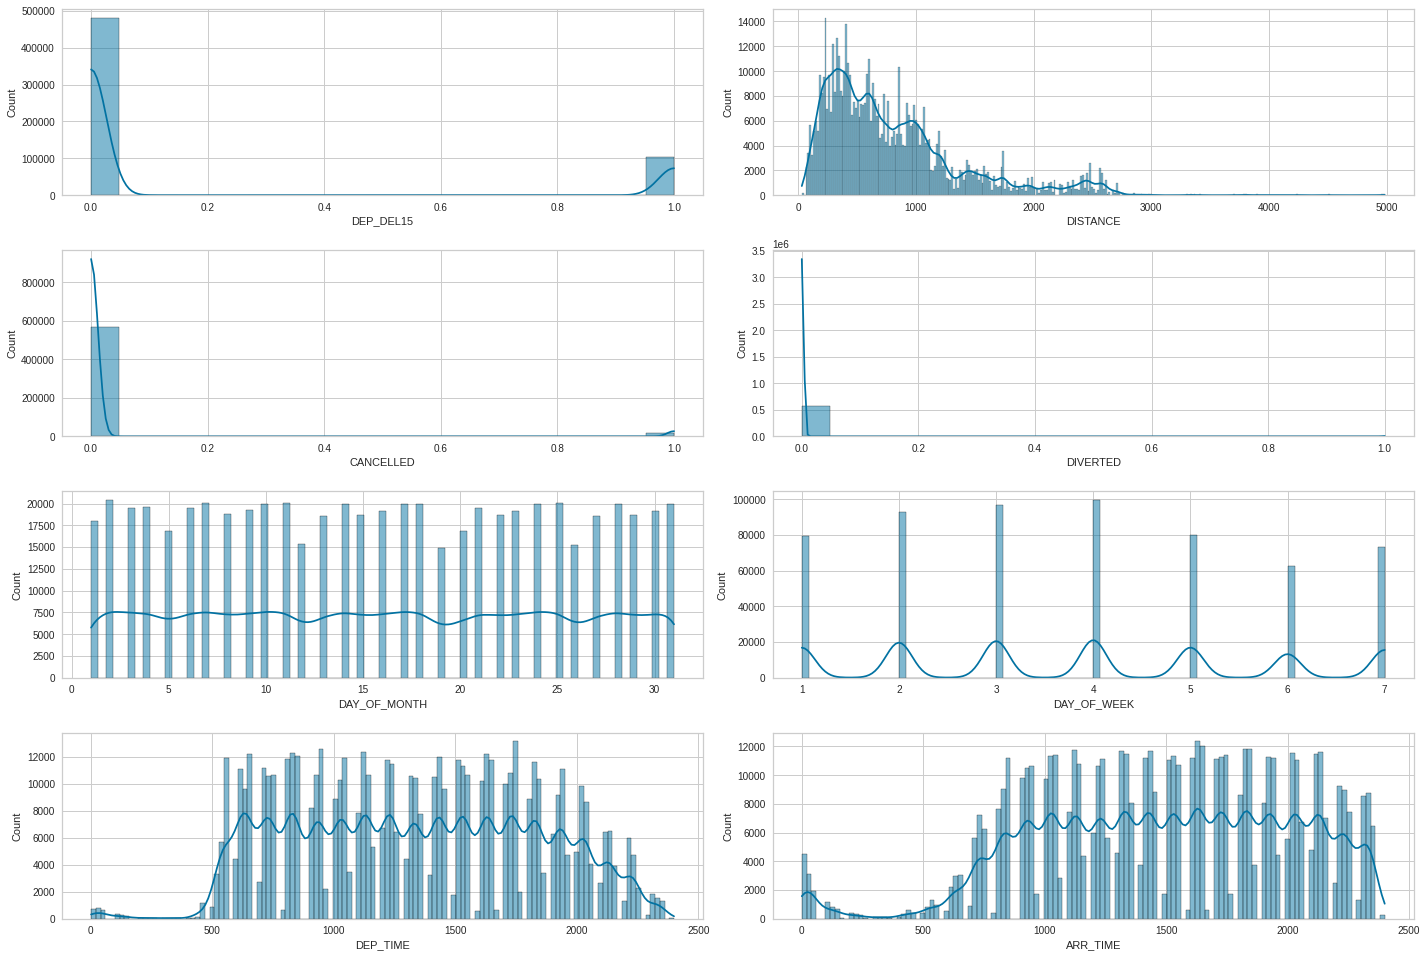

In [51]:
plt.figure(figsize=(20,70))
for i,col in enumerate(columns[:len(columns)-1]):
    ax = plt.subplot(21,2,i + 1)
    sns.histplot(x=col,data=CJan2019[columns],kde=True)
plt.tight_layout()
plt.show()

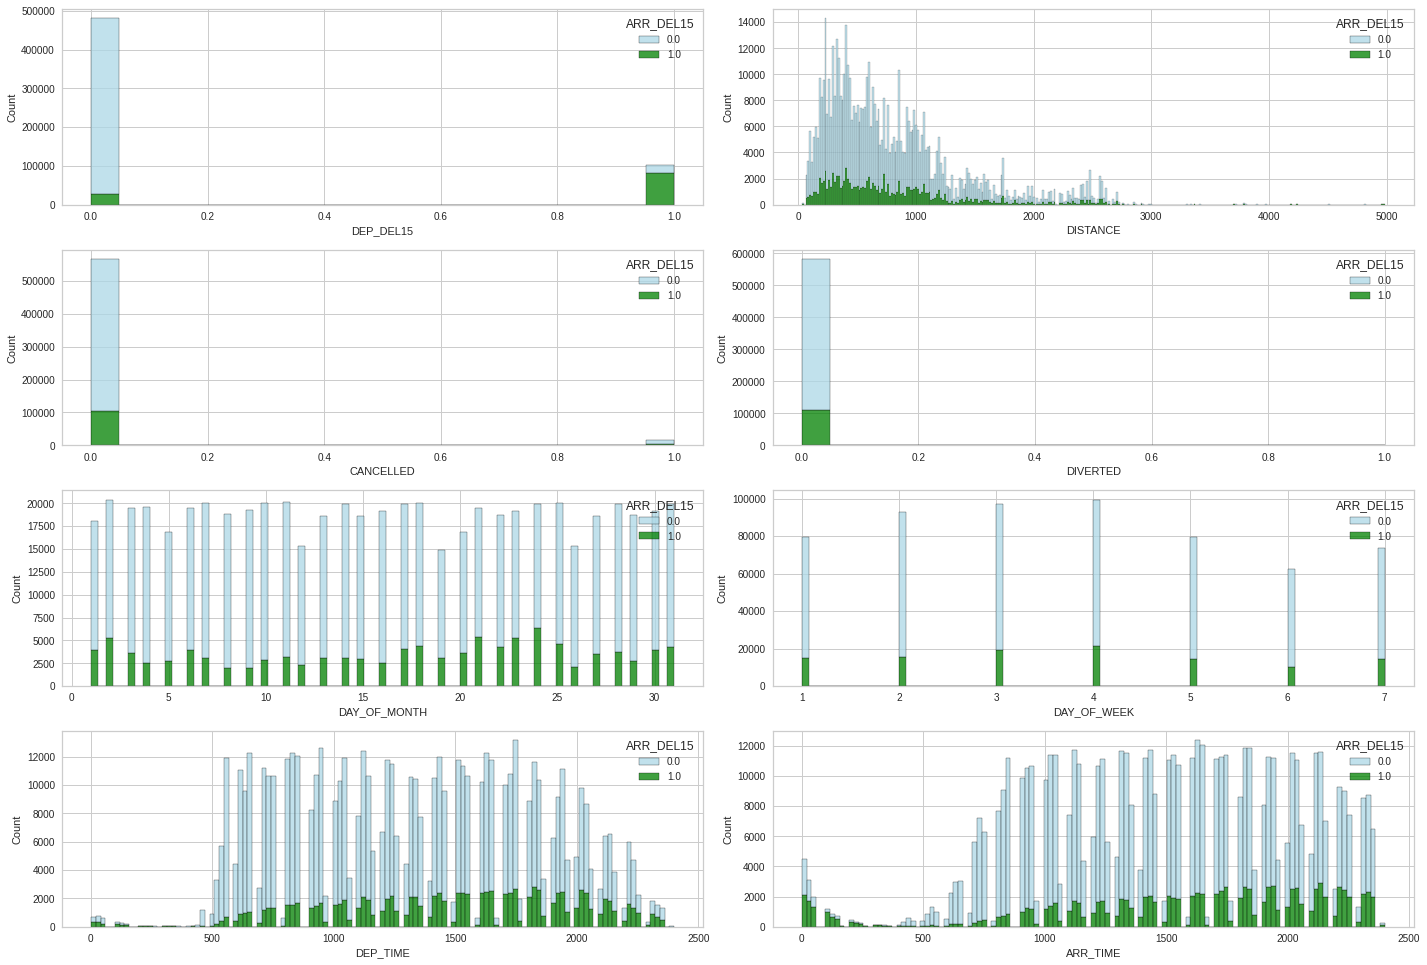

In [52]:
plt.figure(figsize=(20,70))
for i,col in enumerate(columns[:len(columns)-1]):
    ax = plt.subplot(21,2,i + 1)
    sns.histplot(x=col,hue='ARR_DEL15',data=CJan2019[columns],palette=['lightblue','green'],multiple="stack")
plt.tight_layout()
plt.show()

# Exploratory Data Analysis(EDA)

In [53]:
data = CJan2019.drop(['OP_UNIQUE_CARRIER', 'ORIGIN_AIRPORT_ID','ORIGIN_AIRPORT_SEQ_ID','DEST_AIRPORT_ID','DEST_AIRPORT_SEQ_ID'], axis=1)
data = data.set_index('OP_CARRIER_FL_NUM')
data.head()

,DAY_OF_MONTH,DAY_OF_WEEK,ORIGIN,DEST,DEP_TIME,DEP_DEL15,DEP_TIME_BLK,ARR_TIME,ARR_DEL15,CANCELLED,DIVERTED,DISTANCE,DATE,DAY_NAME
OP_CARRIER_FL_NUM,,,,,,,,,,,,,,
3280,1,2,GNV,ATL,601.0,0.0,0600-0659,722.0,0.0,0.0,0.0,300.0,2019-01-01,Tuesday
3281,1,2,MSP,CVG,1359.0,0.0,1400-1459,1633.0,0.0,0.0,0.0,596.0,2019-01-01,Tuesday
3282,1,2,DTW,CVG,1215.0,0.0,1200-1259,1329.0,0.0,0.0,0.0,229.0,2019-01-01,Tuesday
3283,1,2,TLH,ATL,1521.0,0.0,1500-1559,1625.0,0.0,0.0,0.0,223.0,2019-01-01,Tuesday
3284,1,2,ATL,FSM,1847.0,0.0,1900-1959,1940.0,0.0,0.0,0.0,579.0,2019-01-01,Tuesday


##Day Of The Week And Day Of The Month Affecting The Flight Delay

In [54]:
week = (data[['DAY_OF_WEEK','ARR_DEL15']].groupby('DAY_OF_WEEK').sum()/60).sort_values(by='ARR_DEL15',ascending=False)
week['PERCENTUAL'] = week['ARR_DEL15']/(week['ARR_DEL15'].sum())*100
month = (data[['DAY_OF_MONTH','ARR_DEL15']].groupby('DAY_OF_MONTH').sum()/60).sort_values(by='ARR_DEL15',ascending=False)
month['PERCENTUAL'] = month['ARR_DEL15']/(month['ARR_DEL15'].sum())*100

print('>> Delayed flights by day of week<<')
print(week)
print('\n')
print('>> Delayed flights by day of month<<')
print(month)

>> Delayed flights by day of week<<
              ARR_DEL15  PERCENTUAL
DAY_OF_WEEK                        
4            352.366667   19.176591
3            317.700000   17.289953
2            262.766667   14.300356
1            253.583333   13.800579
5            244.400000   13.300801
7            237.100000   12.903518
6            169.566667    9.228202


>> Delayed flights by day of month<<
               ARR_DEL15  PERCENTUAL
DAY_OF_MONTH                        
24            105.150000    5.722501
21             89.216667    4.855373
23             88.283333    4.804579
2              88.100000    4.794601
25             76.016667    4.136999
18             72.966667    3.971011
22             71.666667    3.900262
31             71.116667    3.870330
17             67.050000    3.649013
30             65.866667    3.584613
6              65.600000    3.570100
1              64.966667    3.535633
28             62.716667    3.413183
3              61.083333    3.324293
20       

Thursday (Day 4 of a week) is the day of week when most flights are delayed.<br>
24th January is the day of month when most flights are delayed<br>
<br>
**Note:**<br>
1-Monday, 7-Sunday<br>
delay is in hours

##Weekwise Flights Cancelled

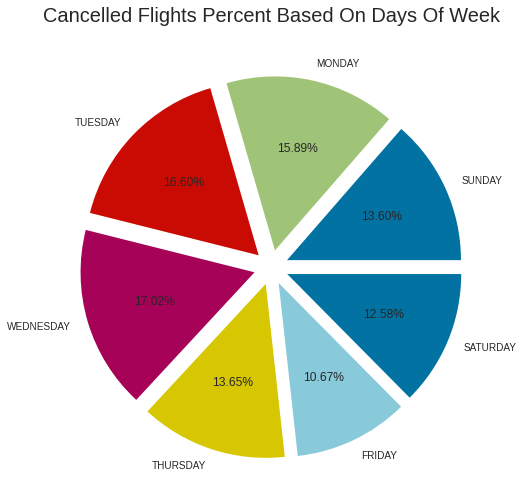

In [55]:
week_cancelled = data.groupby('DAY_OF_WEEK')['CANCELLED'].count()
plt.figure(figsize=(12,8))
plt.pie(week_cancelled.values,autopct='%1.2f%%',labels=['SUNDAY','MONDAY','TUESDAY','WEDNESDAY','THURSDAY','FRIDAY','SATURDAY'],explode=(0.1,0.1,0.1,0.1,0.1,0.1,0.1))
plt.title("Cancelled Flights Percent Based On Days Of Week\n", fontsize=20)
plt.show()

##Cancelled Flights Percentage

In [56]:
set19 = df.drop(['OP_UNIQUE_CARRIER','OP_CARRIER_AIRLINE_ID','OP_CARRIER','TAIL_NUM', 'ORIGIN_AIRPORT_ID','ORIGIN_AIRPORT_SEQ_ID','DEST_AIRPORT_ID','DEST_AIRPORT_SEQ_ID','Unnamed: 21'], axis=1)

In [57]:
set19.columns

Index(['DAY_OF_MONTH', 'DAY_OF_WEEK', 'OP_CARRIER_FL_NUM', 'ORIGIN', 'DEST',
       'DEP_TIME', 'DEP_DEL15', 'DEP_TIME_BLK', 'ARR_TIME', 'ARR_DEL15',
       'CANCELLED', 'DIVERTED', 'DISTANCE'],
      dtype='object')

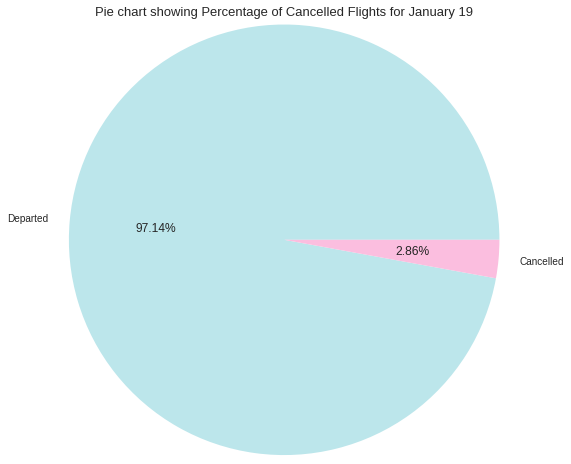

In [58]:
plt.title('Pie chart showing Percentage of Cancelled Flights for January 19\n\n\n\n\n',fontsize=13)
plt.pie(set19['CANCELLED'].value_counts(), labels = ['Departed', 'Cancelled'], radius = 1.8, autopct = '%1.2f%%',colors=['#bce6eb','#fbbedf'])
plt.show()

##Flights Cancelled Over Hours

In [59]:
set19['DEP_TIME'] = set19['DEP_TIME'].astype('str').str[:-2].apply(lambda x: '0' + x if len(x) < 4 else x)
set19.head()

,DAY_OF_MONTH,DAY_OF_WEEK,OP_CARRIER_FL_NUM,ORIGIN,DEST,DEP_TIME,DEP_DEL15,DEP_TIME_BLK,ARR_TIME,ARR_DEL15,CANCELLED,DIVERTED,DISTANCE
0,1,2,3280,GNV,ATL,0601,0.0,0600-0659,722.0,0.0,0.0,0.0,300.0
1,1,2,3281,MSP,CVG,1359,0.0,1400-1459,1633.0,0.0,0.0,0.0,596.0
2,1,2,3282,DTW,CVG,1215,0.0,1200-1259,1329.0,0.0,0.0,0.0,229.0
3,1,2,3283,TLH,ATL,1521,0.0,1500-1559,1625.0,0.0,0.0,0.0,223.0
4,1,2,3284,ATL,FSM,1847,0.0,1900-1959,1940.0,0.0,0.0,0.0,579.0


In [60]:
set19['ARR_TIME'] = set19['ARR_TIME'].astype('str').str[:-2].apply(lambda x: '0' + x if len(x) < 4 else x)
set19.head()

,DAY_OF_MONTH,DAY_OF_WEEK,OP_CARRIER_FL_NUM,ORIGIN,DEST,DEP_TIME,DEP_DEL15,DEP_TIME_BLK,ARR_TIME,ARR_DEL15,CANCELLED,DIVERTED,DISTANCE
0,1,2,3280,GNV,ATL,0601,0.0,0600-0659,0722,0.0,0.0,0.0,300.0
1,1,2,3281,MSP,CVG,1359,0.0,1400-1459,1633,0.0,0.0,0.0,596.0
2,1,2,3282,DTW,CVG,1215,0.0,1200-1259,1329,0.0,0.0,0.0,229.0
3,1,2,3283,TLH,ATL,1521,0.0,1500-1559,1625,0.0,0.0,0.0,223.0
4,1,2,3284,ATL,FSM,1847,0.0,1900-1959,1940,0.0,0.0,0.0,579.0


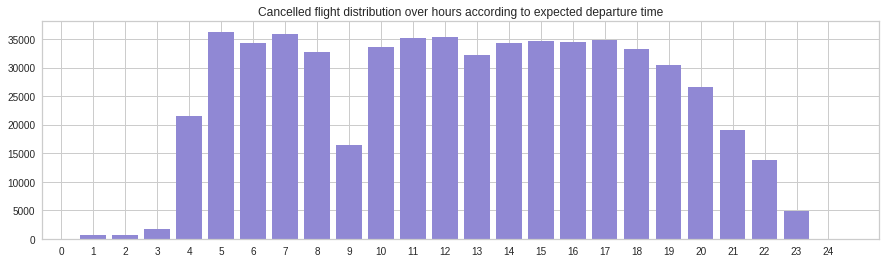

In [61]:
plt.figure(figsize=(15, 4))
#plt.bar(np.arange(1), set19['CANCELLED'].groupby(set19['DEP_TIME'].astype('str').str[:2]).count()[0], hatch='/', alpha=.4)
plt.bar(np.arange(1, 25), set19['CANCELLED'].groupby(set19['DEP_TIME'].astype('str').str[:2]).count()[1:],color='#9088d4')
plt.xticks(np.arange(25), np.arange(0, 25))
plt.title('Cancelled flight distribution over hours according to expected departure time')
plt.show()

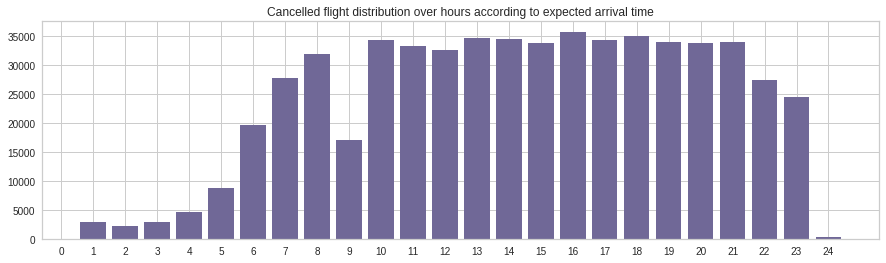

In [62]:
plt.figure(figsize=(15, 4))
plt.bar(np.arange(1, 25), set19['CANCELLED'].groupby(set19['ARR_TIME'].astype('str').str[:2]).count()[1:],color='#706897')
plt.xticks(np.arange(25), np.arange(0, 25))
plt.title('Cancelled flight distribution over hours according to expected arrival time')
plt.show()

##Correlation Between Arrival And Departure Delays By Airports

In [63]:
originAirport = (data[['ORIGIN','DEP_DEL15']].groupby('ORIGIN').sum()).sort_values(by='DEP_DEL15',ascending=False)
destAirport = (data[['DEST','ARR_DEL15']].groupby('DEST').sum()).sort_values(by='ARR_DEL15',ascending=False)

In [64]:
originAirport.head()

,DEP_DEL15
ORIGIN,
ORD,7285.0
ATL,4188.0
DFW,4109.0
LGA,3957.0
DEN,3479.0


In [65]:
destAirport.head()

,ARR_DEL15
DEST,
ORD,7283.0
LGA,5049.0
DFW,4376.0
ATL,3999.0
SFO,3852.0


To Check The Correlation Of DEP_DEL15 And ARR_DEL15


In [66]:
m,c,r,p,err = linregress(data['DEP_DEL15'],data['ARR_DEL15'])
correlationPercent = round(r*100,2)
d = data.copy()
correlationPercent

71.8

##No.of Flights Arriving Late based On OP Carrier

In [67]:
Jan2019.loc[Jan2019['ARR_DEL15']==1.0].groupby(Jan2019['OP_UNIQUE_CARRIER'])['OP_UNIQUE_CARRIER'].count()

OP_UNIQUE_CARRIER
9E     4124
AA    14200
AS     3698
B6     6824
DL     9493
EV     3303
F9     2398
G4     1748
HA      856
MQ     6450
NK     2431
OH     3667
OO    14940
UA     9360
WN    17012
YV     3441
YX     6304
Name: OP_UNIQUE_CARRIER, dtype: int64

##No.of Flights Departing Late Based On OP Carriers

In [68]:
Jan2019.loc[Jan2019['DEP_DEL15']==1.0].groupby(Jan2019['OP_UNIQUE_CARRIER'])['OP_UNIQUE_CARRIER'].count()

OP_UNIQUE_CARRIER
9E     3826
AA    12443
AS     2933
B6     6728
DL     9523
EV     2758
F9     2369
G4     1452
HA      585
MQ     5185
NK     2209
OH     3500
OO    13418
UA     8578
WN    19412
YV     3017
YX     5174
Name: OP_UNIQUE_CARRIER, dtype: int64

##Days Of Week Where There Are More Arrival Delays

In [69]:
Jan2019.loc[Jan2019['ARR_DEL15']==1.0].groupby(Jan2019['DAY_NAME'])['OP_UNIQUE_CARRIER'].count().sort_values()

DAY_NAME
Saturday     10174
Sunday       14226
Friday       14664
Monday       15215
Tuesday      15766
Wednesday    19062
Thursday     21142
Name: OP_UNIQUE_CARRIER, dtype: int64

##Days of the week where there are more departure delays

In [70]:
Jan2019.loc[Jan2019['DEP_DEL15']==1.0].groupby(Jan2019['DAY_NAME'])['OP_UNIQUE_CARRIER'].count().sort_values()

DAY_NAME
Saturday      9269
Sunday       13279
Friday       13742
Monday       14279
Tuesday      15004
Wednesday    17708
Thursday     19829
Name: OP_UNIQUE_CARRIER, dtype: int64

In [71]:
Jan2019.groupby('OP_UNIQUE_CARRIER')['DISTANCE'].describe()

,count,mean,std,min,25%,50%,75%,max
OP_UNIQUE_CARRIER,,,,,,,,
9E,20198.0,470.031686,264.800337,74.0,266.0,419.0,596.0,1416.0
AA,77017.0,987.505200,628.262003,83.0,544.0,888.0,1242.0,4243.0
AS,20744.0,1315.055872,847.151626,31.0,626.0,987.0,2335.0,2874.0
B6,24443.0,1113.983922,697.640261,68.0,612.0,1028.0,1237.0,2704.0
DL,73836.0,897.824720,621.470031,106.0,444.0,696.0,1142.0,4983.0
EV,13195.0,454.359985,221.188406,67.0,284.0,427.0,595.0,1134.0
F9,9647.0,1068.328392,407.505478,368.0,794.0,1011.0,1299.0,2193.0
G4,6763.0,909.691261,313.962626,259.0,667.0,920.0,1111.0,1900.0
HA,6798.0,739.772433,1097.973268,84.0,100.0,163.0,263.0,4983.0


##Distances Travelled By Each OP Carrier 

In [72]:
Jan2019.groupby(Jan2019['OP_UNIQUE_CARRIER'])['DISTANCE'].sum()

OP_UNIQUE_CARRIER
9E     9493700.0
AA    76054688.0
AS    27279519.0
B6    27229109.0
DL    66291786.0
EV     5995280.0
F9    10306164.0
G4     6152242.0
HA     5028973.0
MQ    11146028.0
NK    15495367.0
OH     8996451.0
OO    32360065.0
UA    56312320.0
WN    81871773.0
YV    10668743.0
YX    15187602.0
Name: DISTANCE, dtype: float64

##correlation between departure and arrival delay using heatmap

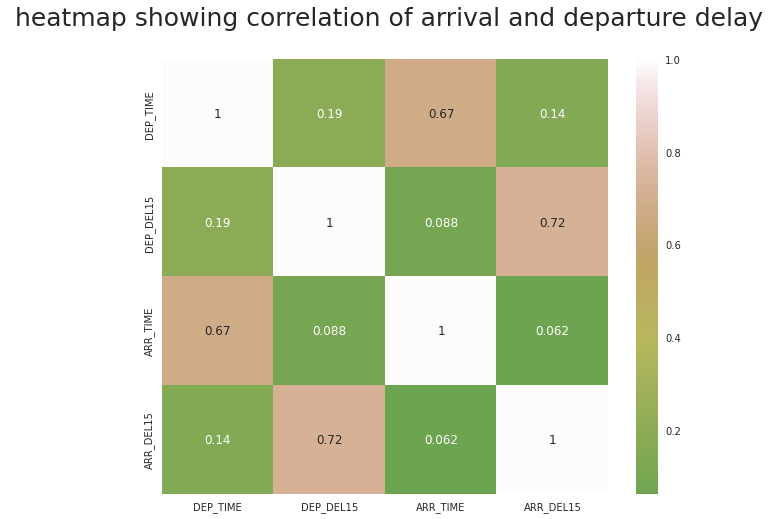

In [73]:
sns.set_style('whitegrid')
plt.figure(figsize=(10,8))
heat = CJan2019[['DEP_TIME','DEP_DEL15','ARR_TIME','ARR_DEL15']]
sns.heatmap(heat.corr(), xticklabels=heat.corr().columns, yticklabels=heat.corr().columns, cmap='gist_earth', center=0, annot=True)
plt.title(' heatmap showing correlation of arrival and departure delay\n',fontsize=25)
plt.show()

we can see that when the flight is delayed at departure it is highly likely that it'll be delayed at arrival time, that is most flights ply on time 

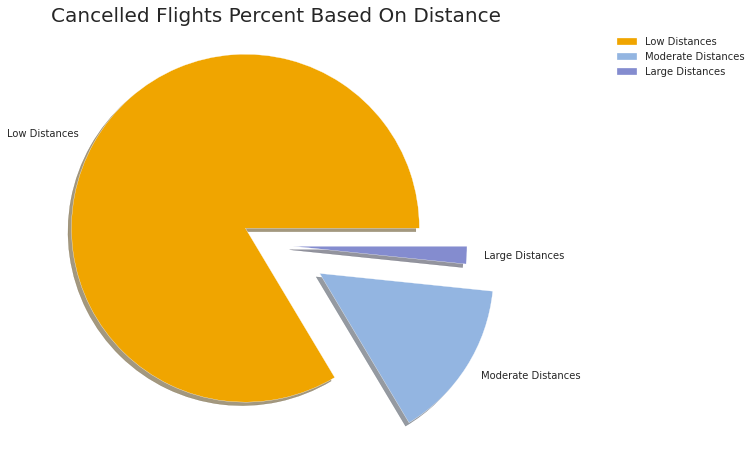

In [74]:
final_df=data.copy()
shortDist = final_df[(final_df['DISTANCE']<=1000) & (final_df['CANCELLED']==1.0)]['CANCELLED'].count()
moderateDist = final_df[((final_df['DISTANCE']> 1000) & (final_df['DISTANCE']<=2000)) & (final_df['CANCELLED']==1.0)]['CANCELLED'].count()
largeDist = final_df[(final_df['DISTANCE']> 2000) & (final_df['CANCELLED']==1.0)]['CANCELLED'].count()
plt.figure(figsize=(12,8))
plt.pie([shortDist,moderateDist,largeDist], colors=['#f0a500','#93b5e1','#848ccf'],labels = ['Low Distances','Moderate Distances','Large Distances'],shadow=True,explode=(0.2,0.3,0.1))
plt.legend(bbox_to_anchor=(1.6,1))
plt.title("Cancelled Flights Percent Based On Distance", fontsize=20)
plt.show()

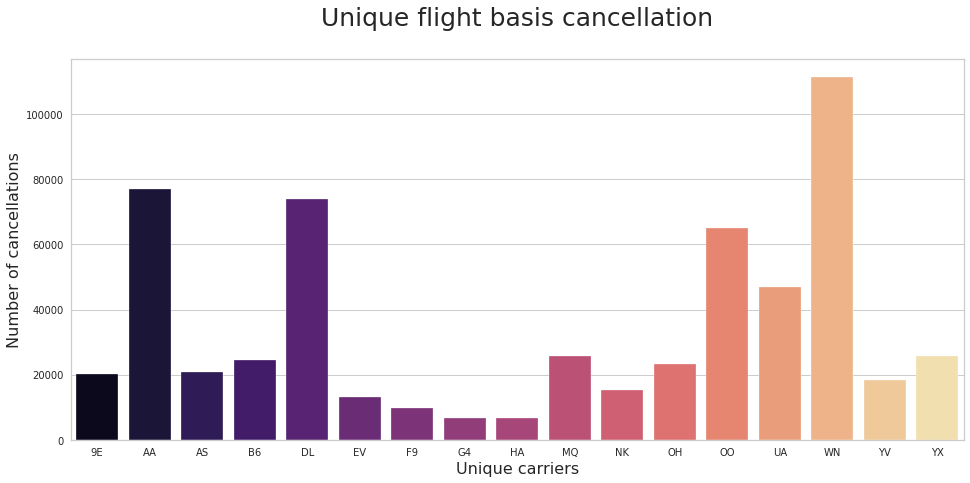

In [75]:
opCarrier_cancelled = CJan2019.groupby('OP_UNIQUE_CARRIER')['CANCELLED'].count()
plt.figure(figsize=(16,7))
sns.barplot(x = opCarrier_cancelled.index, y = opCarrier_cancelled.values,palette = 'magma')
plt.title('Unique flight basis cancellation\n',fontsize = 25)
plt.xlabel('Unique carriers',fontsize=16)
plt.ylabel('Number of cancellations',fontsize=16)
plt.show()

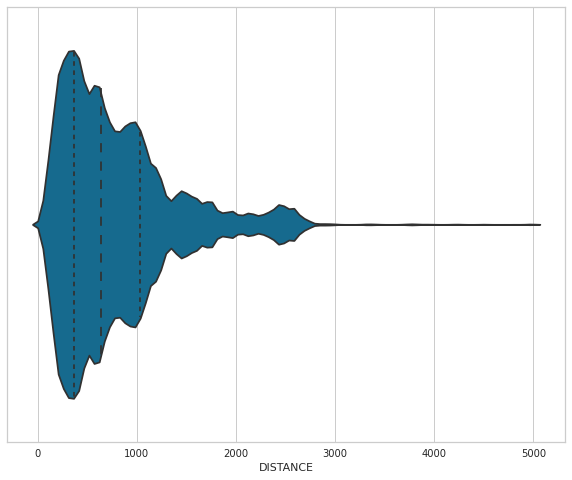

In [76]:
plt.figure(figsize=(10,8))
sns.violinplot(x='DISTANCE',data=CJan2019,inner='quartile')
plt.show()

In [77]:
final_df['DEP_TIME_BLK'].value_counts()

0600-0659    41971
0800-0859    39031
0700-0759    38450
1700-1759    37254
1200-1259    36918
1100-1159    36774
1500-1559    35988
1400-1459    35925
1000-1059    35768
1600-1659    35250
1800-1859    34670
0900-0959    34384
1300-1359    33413
1900-1959    31823
2000-2059    26057
2100-2159    17844
0001-0559    15877
2200-2259    13019
2300-2359     3569
Name: DEP_TIME_BLK, dtype: int64

##Analysing Most No.of Flights Are From Tuesday (After removing redundant travels on different days) .Also Distance Range On Each Days 

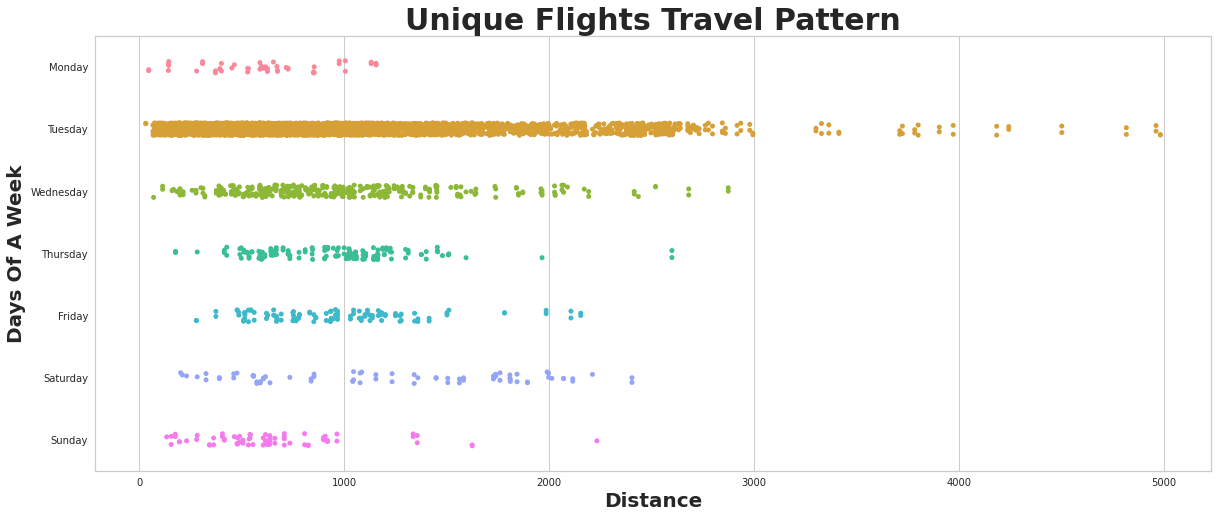

In [78]:
plt.figure(figsize = (20,8))
d_new = CJan2019.drop_duplicates(subset=['ORIGIN','DEST'])
sns.stripplot(y='DAY_NAME',x = 'DISTANCE', data = d_new, order=['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'])
plt.xlabel('Distance',fontdict={'size':20,'weight':'bold'})
plt.ylabel('Days Of A Week',fontdict={'size':20,'weight':'bold'})
plt.title('Unique Flights Travel Pattern',fontdict={'size':30,'weight':'bold'})
plt.show()

##Most Busy Time Slots

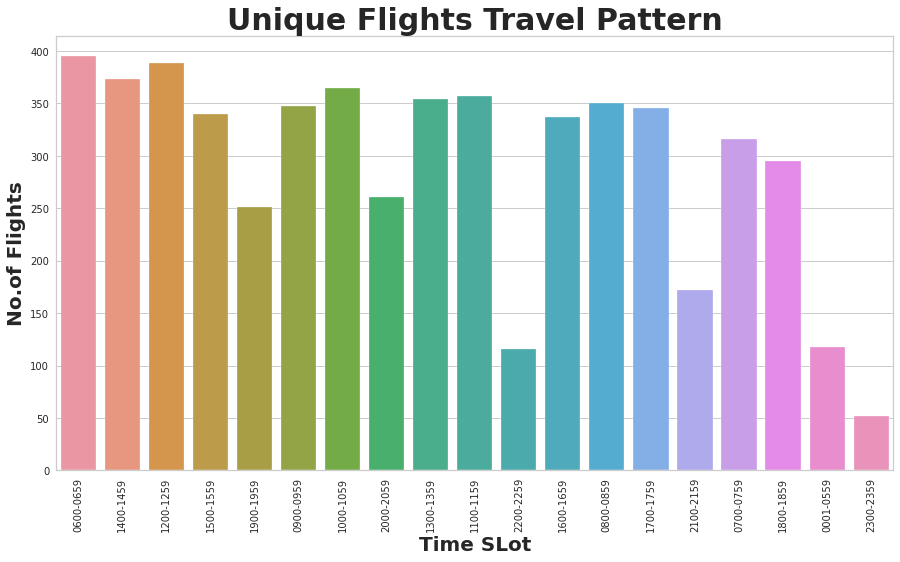

In [79]:
plt.figure(figsize=(15,8))
sns.countplot(x='DEP_TIME_BLK',data=d_new)
plt.xlabel('Time SLot',fontdict={'size':20,'weight':'bold'})
plt.ylabel('No.of Flights',fontdict={'size':20,'weight':'bold'})
plt.title('Unique Flights Travel Pattern',fontdict={'size':30,'weight':'bold'})
plt.xticks(rotation = 90)
plt.show()

##Outlier Detection

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


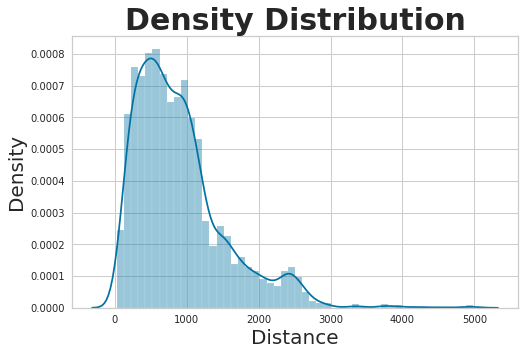

In [80]:
plt.figure(figsize=(8,5))
sns.distplot(d_new, x=d_new['DISTANCE'])
plt.title('Density Distribution',fontdict={'size':30,'weight':'bold'})
plt.xlabel('Distance',fontsize = 20)
plt.ylabel('Density',fontsize = 20)
plt.show()

In [81]:
lower = d_new['DISTANCE'].mean()-(3*d_new['DISTANCE'].std())
upper = d_new['DISTANCE'].mean()+(3*d_new['DISTANCE'].std())
d_out_free = Jan2019.loc[(Jan2019['DISTANCE']<upper) & (Jan2019['DISTANCE']>lower)]
d_out_free.shape

(582514, 20)

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


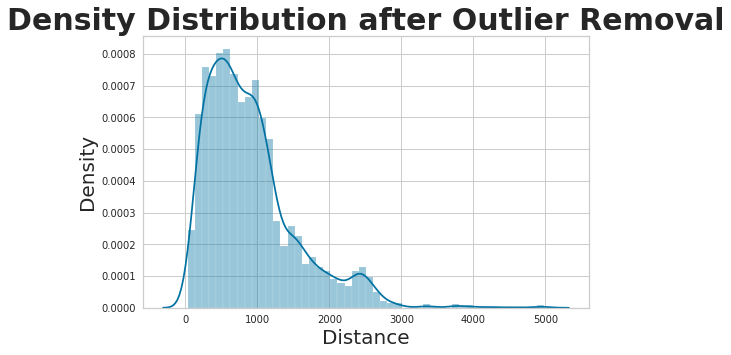

In [82]:
plt.figure(figsize=(8,5))
sns.distplot(d_new, x=d_new['DISTANCE'])
plt.title('Density Distribution after Outlier Removal',fontdict={'size':30,'weight':'bold'})
plt.xlabel('Distance',fontsize = 20)
plt.ylabel('Density',fontsize = 20)
plt.show()

#Applying Machine Learning Model

In [83]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import mean_absolute_error
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.metrics import classification_report, roc_auc_score,precision_score,recall_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import StratifiedKFold, cross_val_score,cross_val_predict

In [84]:
Jan2019.head()

,DAY_OF_MONTH,DAY_OF_WEEK,OP_UNIQUE_CARRIER,OP_CARRIER_FL_NUM,ORIGIN_AIRPORT_ID,ORIGIN_AIRPORT_SEQ_ID,ORIGIN,DEST_AIRPORT_ID,DEST_AIRPORT_SEQ_ID,DEST,DEP_TIME,DEP_DEL15,DEP_TIME_BLK,ARR_TIME,ARR_DEL15,CANCELLED,DIVERTED,DISTANCE,DATE,DAY_NAME
0,1,2,9E,3280,11953,1195302,GNV,10397,1039707,ATL,601.0,0.0,0600-0659,722.0,0.0,0.0,0.0,300.0,2019-01-01,Tuesday
1,1,2,9E,3281,13487,1348702,MSP,11193,1119302,CVG,1359.0,0.0,1400-1459,1633.0,0.0,0.0,0.0,596.0,2019-01-01,Tuesday
2,1,2,9E,3282,11433,1143302,DTW,11193,1119302,CVG,1215.0,0.0,1200-1259,1329.0,0.0,0.0,0.0,229.0,2019-01-01,Tuesday
3,1,2,9E,3283,15249,1524906,TLH,10397,1039707,ATL,1521.0,0.0,1500-1559,1625.0,0.0,0.0,0.0,223.0,2019-01-01,Tuesday
4,1,2,9E,3284,10397,1039707,ATL,11778,1177801,FSM,1847.0,0.0,1900-1959,1940.0,0.0,0.0,0.0,579.0,2019-01-01,Tuesday


In [85]:
Jan2019.shape

(583985, 20)

In [86]:
Jan2019['ARR_DEL15'].value_counts()

0.0    473736
1.0    110249
Name: ARR_DEL15, dtype: int64

Dropping Weakly Correlated Features

In [87]:
Jan2019 = Jan2019.drop(['ORIGIN','ORIGIN_AIRPORT_ID','ORIGIN_AIRPORT_SEQ_ID','DEST_AIRPORT_ID','DEST_AIRPORT_SEQ_ID','DEST','DATE','DAY_NAME'], axis=1)

In [88]:
label_encoder = LabelEncoder()
data=Jan2019.drop(columns=['ARR_DEL15'])
labels=Jan2019['ARR_DEL15']
X_train,X_test,y_train,y_test = train_test_split(data,labels,test_size = 0.2,random_state = 42)

In [89]:
object_col = ['OP_UNIQUE_CARRIER','DEP_TIME_BLK']
for col in object_col:
    X_train[col] = label_encoder.fit_transform(X_train[col])
    X_test[col] = label_encoder.fit_transform(X_test[col])

In [90]:
Jan2019.shape

(583985, 12)




##K-NN

In [91]:
import sklearn
from sklearn import datasets
from math import sqrt
from sklearn import metrics

In [92]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=20)
knn.fit(X_train, y_train)

y_pred = knn.predict(X_test)
y_pred_train = knn.predict(X_train)

In [93]:
acc = accuracy_score(y_test,y_pred)
print(acc)
acc = accuracy_score(y_train,y_pred_train)
print(acc)

0.8295761021259108
0.8352804438470166


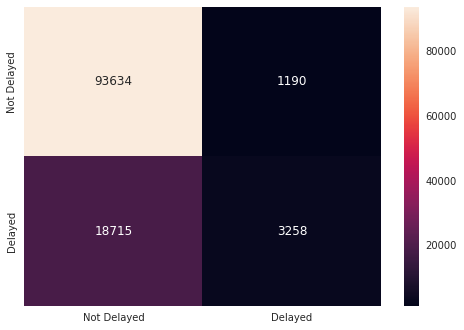

In [94]:
labels_=['Not Delayed','Delayed']
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm,annot=True,fmt='d',xticklabels=labels_,yticklabels=labels_)

In [95]:
cv = StratifiedKFold(n_splits=3, shuffle=True)
result = cross_val_score(knn,X_train,y_train, cv=cv, scoring='roc_auc', n_jobs=-1)
print(np.mean(result))

0.7384427509541203


In [96]:
print(classification_report(y_test, y_pred, digits=4))

              precision    recall  f1-score   support

         0.0     0.8334    0.9875    0.9039     94824
         1.0     0.7325    0.1483    0.2466     21973

    accuracy                         0.8296    116797
   macro avg     0.7829    0.5679    0.5753    116797
weighted avg     0.8144    0.8296    0.7803    116797



Tuning the hyper parameters that is changing number of nearest neighbours

In [97]:
knn = KNeighborsClassifier(n_neighbors=2)
knn.fit(X_train, y_train)

y_pred = knn.predict(X_test)
y_pred_train = knn.predict(X_train)

In [98]:
acc = accuracy_score(y_test,y_pred)
print(acc)
acc = accuracy_score(y_train,y_pred_train)
print(acc)

0.8679161279827393
0.9259527213883918


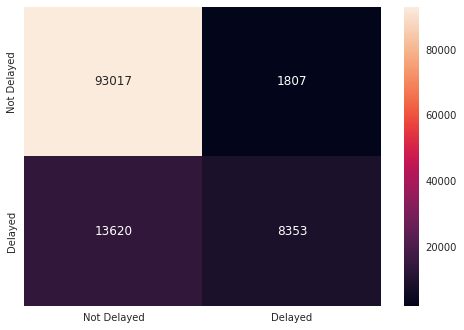

In [99]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm,annot=True,fmt='d',xticklabels=labels_,yticklabels=labels_)

In [100]:
cv = StratifiedKFold(n_splits=3, shuffle=True)
result = cross_val_score(knn,X_train,y_train, cv=cv, scoring='roc_auc', n_jobs=-1)
print(np.mean(result))

0.7855979128275554


In [101]:
print(classification_report(y_test, y_pred, digits=4))

              precision    recall  f1-score   support

         0.0     0.8723    0.9809    0.9234     94824
         1.0     0.8221    0.3801    0.5199     21973

    accuracy                         0.8679    116797
   macro avg     0.8472    0.6805    0.7217    116797
weighted avg     0.8628    0.8679    0.8475    116797



## Naive Bayes

In [102]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(X_train,y_train)

GaussianNB()

In [103]:
y_pred=nb.predict(X_test)

In [104]:
acc = accuracy_score(y_test,y_pred)
print(acc)

0.8977370994117999


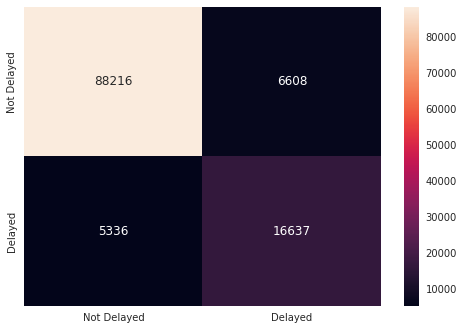

In [105]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm,annot=True,fmt='d',xticklabels=labels_,yticklabels=labels_)

In [106]:
cv = StratifiedKFold(n_splits=3, shuffle=True)
result = cross_val_score(nb,X_train,y_train, cv=cv, scoring='roc_auc', n_jobs=-1)
print(np.mean(result))

0.851944546042661


In [107]:
print(classification_report(y_test, y_pred, digits=4))

              precision    recall  f1-score   support

         0.0     0.9430    0.9303    0.9366     94824
         1.0     0.7157    0.7572    0.7359     21973

    accuracy                         0.8977    116797
   macro avg     0.8293    0.8437    0.8362    116797
weighted avg     0.9002    0.8977    0.8988    116797



## Decision Tree Classifier

In [108]:
Jan2019.describe()

,DAY_OF_MONTH,DAY_OF_WEEK,OP_CARRIER_FL_NUM,DEP_TIME,DEP_DEL15,ARR_TIME,ARR_DEL15,CANCELLED,DIVERTED,DISTANCE
count,583985.000000,583985.000000,583985.000000,583985.000000,583985.000000,583985.000000,583985.000000,583985.000000,583985.000000,583985.000000
mean,15.960088,3.835626,2537.869334,1331.869377,0.176563,1483.949627,0.188787,0.028641,0.002219,797.742767
std,8.987942,1.921899,1821.736145,495.546089,0.381299,523.320493,0.391340,0.166796,0.047056,589.999261
min,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,31.000000
25%,8.000000,2.000000,979.000000,921.000000,0.000000,1103.000000,0.000000,0.000000,0.000000,363.000000
50%,16.000000,4.000000,2114.000000,1328.000000,0.000000,1516.000000,0.000000,0.000000,0.000000,640.000000
75%,24.000000,5.000000,3902.000000,1738.000000,0.000000,1919.000000,0.000000,0.000000,0.000000,1037.000000
max,31.000000,7.000000,7439.000000,2400.000000,1.000000,2400.000000,1.000000,1.000000,1.000000,4983.000000


In [109]:
from sklearn.tree import DecisionTreeClassifier
clf_dt = DecisionTreeClassifier(random_state =42,max_depth=7,min_samples_leaf=3)
model_dt = clf_dt.fit(X_train, y_train)

In [110]:
y_pred = clf_dt.predict(X_test)
acc = accuracy_score(y_test,y_pred)
print('acc',acc)

acc 0.9162820962867196


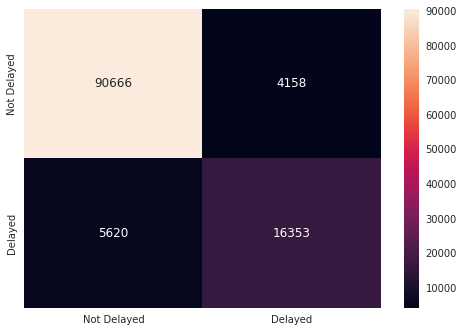

In [111]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm,annot=True,fmt='d',xticklabels=labels_,yticklabels=labels_)

In [112]:
cv = StratifiedKFold(n_splits=3, shuffle=True)
result = cross_val_score(clf_dt,X_train,y_train, cv=cv, scoring='roc_auc', n_jobs=-1)
print(np.mean(result))

0.8800198747282352


In [113]:
print(classification_report(y_test, y_pred, digits=4))

              precision    recall  f1-score   support

         0.0     0.9416    0.9562    0.9488     94824
         1.0     0.7973    0.7442    0.7698     21973

    accuracy                         0.9163    116797
   macro avg     0.8695    0.8502    0.8593    116797
weighted avg     0.9145    0.9163    0.9152    116797



Tuning the hyper parameters that is chaging the depth and mmin_samples_leaf

In [114]:
clf_dt = DecisionTreeClassifier(random_state =42,max_depth=20,min_samples_leaf=8)
model_dt = clf_dt.fit(X_train, y_train)

In [115]:
y_pred = clf_dt.predict(X_test)
acc = accuracy_score(y_test,y_pred)
print('acc',acc)

acc 0.910879560262678


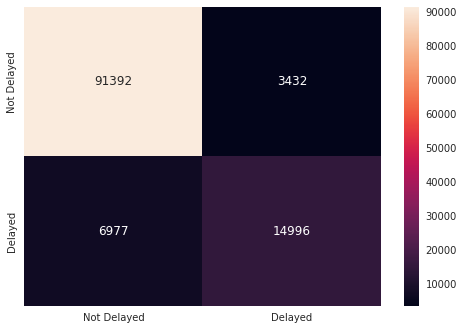

In [116]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm,annot=True,fmt='d',xticklabels=labels_,yticklabels=labels_)

In [117]:
cv = StratifiedKFold(n_splits=3, shuffle=True)
result = cross_val_score(clf_dt,X_train,y_train, cv=cv, scoring='roc_auc', n_jobs=-1)
print(np.mean(result))

0.8874686343829136


In [118]:
print(classification_report(y_test, y_pred, digits=4))

              precision    recall  f1-score   support

         0.0     0.9291    0.9638    0.9461     94824
         1.0     0.8138    0.6825    0.7424     21973

    accuracy                         0.9109    116797
   macro avg     0.8714    0.8231    0.8442    116797
weighted avg     0.9074    0.9109    0.9078    116797



## Logistic Regression

In [119]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(random_state=42,max_iter=1000)
lr.fit(X_train,y_train)

LogisticRegression(max_iter=1000, random_state=42)

In [120]:
y_pred=lr.predict(X_test)

In [121]:
acc = accuracy_score(y_test,y_pred)
print(acc)

0.9158111937806622


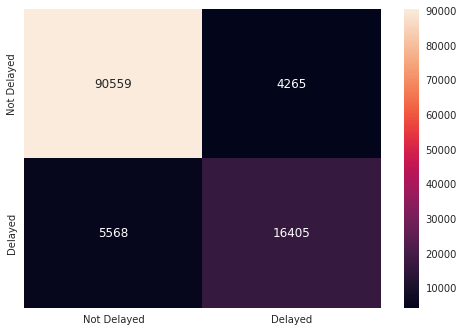

In [122]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm,annot=True,fmt='d',xticklabels=labels_,yticklabels=labels_)

In [123]:
cv = StratifiedKFold(n_splits=3, shuffle=True)
result = cross_val_score(lr,X_train,y_train, cv=cv, scoring='roc_auc', n_jobs=-1)
print(np.mean(result))

0.8582219887976487


In [124]:
print(classification_report(y_test, y_pred, digits=4))

              precision    recall  f1-score   support

         0.0     0.9421    0.9550    0.9485     94824
         1.0     0.7937    0.7466    0.7694     21973

    accuracy                         0.9158    116797
   macro avg     0.8679    0.8508    0.8590    116797
weighted avg     0.9142    0.9158    0.9148    116797



Tuning the hyper parameters that is changing number of max iterations

In [125]:
lr = LogisticRegression(random_state=42,max_iter=200)
lr.fit(X_train,y_train)

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(max_iter=200, random_state=42)

In [126]:
y_pred=lr.predict(X_test)

In [127]:
acc = accuracy_score(y_test,y_pred)
print(acc)

0.9086962850073204


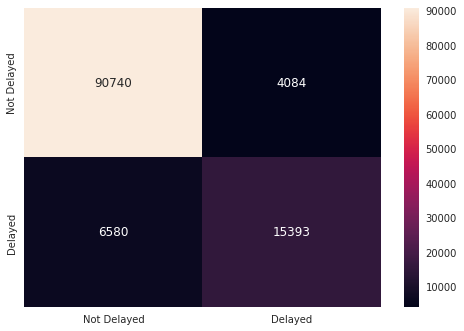

In [128]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm,annot=True,fmt='d',xticklabels=labels_,yticklabels=labels_)

In [129]:
cv = StratifiedKFold(n_splits=3, shuffle=True)
result = cross_val_score(lr,X_train,y_train, cv=cv, scoring='roc_auc', n_jobs=-1)
print(np.mean(result))

0.847798903755078


In [130]:
print(classification_report(y_test, y_pred, digits=4))

              precision    recall  f1-score   support

         0.0     0.9324    0.9569    0.9445     94824
         1.0     0.7903    0.7005    0.7427     21973

    accuracy                         0.9087    116797
   macro avg     0.8614    0.8287    0.8436    116797
weighted avg     0.9057    0.9087    0.9065    116797



## Gradient Boosting Decision Classifier

In [131]:
from sklearn.ensemble import GradientBoostingClassifier
gbdc = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0,max_depth=1, random_state=42)
gbdc.fit(X_train, y_train)


GradientBoostingClassifier(learning_rate=1.0, max_depth=1, random_state=42)

In [132]:
y_pred=gbdc.predict(X_test)

In [133]:
acc = accuracy_score(y_test,y_pred)
print(acc)

0.9151348065446886


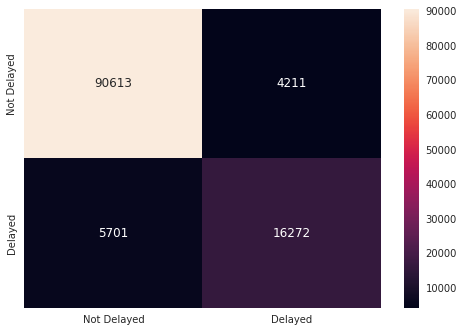

In [134]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm,annot=True,fmt='d',xticklabels=labels_,yticklabels=labels_)

In [135]:
cv = StratifiedKFold(n_splits=3, shuffle=True)
result = cross_val_score(gbdc,X_train,y_train, cv=cv, scoring='roc_auc', n_jobs=-1)
print(np.mean(result))

0.8967553412081356


In [136]:
print(classification_report(y_test, y_pred, digits=4))

              precision    recall  f1-score   support

         0.0     0.9408    0.9556    0.9481     94824
         1.0     0.7944    0.7405    0.7665     21973

    accuracy                         0.9151    116797
   macro avg     0.8676    0.8481    0.8573    116797
weighted avg     0.9133    0.9151    0.9140    116797



Tuning the hyper parameters that is changing n_estimators and max_depth

In [137]:
gbdc = GradientBoostingClassifier(n_estimators=120, learning_rate=1.0,max_depth=5, random_state=42)
gbdc.fit(X_train, y_train)


GradientBoostingClassifier(learning_rate=1.0, max_depth=5, n_estimators=120,
                           random_state=42)

In [138]:
y_pred=gbdc.predict(X_test)

In [139]:
acc = accuracy_score(y_test,y_pred)
print(acc)

0.9194414240091783


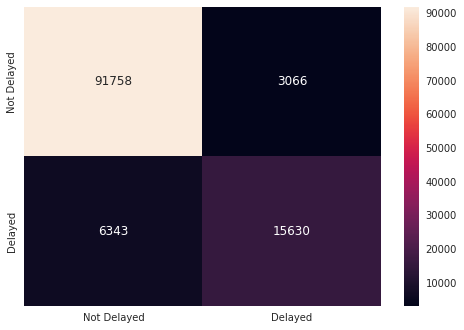

In [140]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm,annot=True,fmt='d',xticklabels=labels_,yticklabels=labels_)

In [141]:
cv = StratifiedKFold(n_splits=3, shuffle=True)
result = cross_val_score(gbdc,X_train,y_train, cv=cv, scoring='roc_auc', n_jobs=-1)
print(np.mean(result))

0.9256740179684891


In [142]:
print(classification_report(y_test, y_pred, digits=4))

              precision    recall  f1-score   support

         0.0     0.9353    0.9677    0.9512     94824
         1.0     0.8360    0.7113    0.7686     21973

    accuracy                         0.9194    116797
   macro avg     0.8857    0.8395    0.8599    116797
weighted avg     0.9167    0.9194    0.9169    116797



##Random Forest Classifier

In [143]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=50,max_depth=50,random_state=0)
rfc.fit(X_train, y_train)

RandomForestClassifier(max_depth=50, n_estimators=50, random_state=0)

In [144]:
y_pred = rfc.predict(X_test)

In [145]:
acc = accuracy_score(y_test,y_pred)
acc

0.9226606847778624

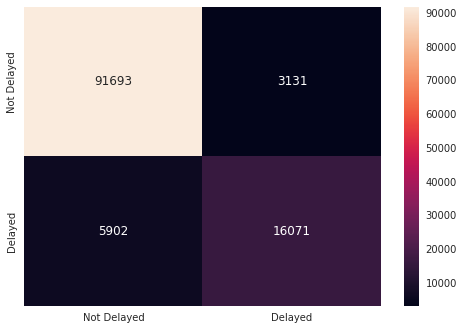

In [146]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm,annot=True,fmt='d',xticklabels=labels_,yticklabels=labels_)

In [147]:
cv = StratifiedKFold(n_splits=3, shuffle=True)
result = cross_val_score(rfc,X_train,y_train, cv=cv, scoring='roc_auc', n_jobs=-1)
print(np.mean(result))

0.9373352494778072


In [148]:
print(classification_report(y_test, y_pred, digits=4))

              precision    recall  f1-score   support

         0.0     0.9395    0.9670    0.9531     94824
         1.0     0.8369    0.7314    0.7806     21973

    accuracy                         0.9227    116797
   macro avg     0.8882    0.8492    0.8668    116797
weighted avg     0.9202    0.9227    0.9206    116797



Tuning the hyper parameters that is changing n_estimators and max_depth

In [149]:
rfc = RandomForestClassifier(n_estimators=125,max_depth=3,random_state=0)
rfc.fit(X_train, y_train)

RandomForestClassifier(max_depth=3, n_estimators=125, random_state=0)

In [150]:
y_pred = rfc.predict(X_test)

In [151]:
acc = accuracy_score(y_test,y_pred)
acc

0.9157683844619297

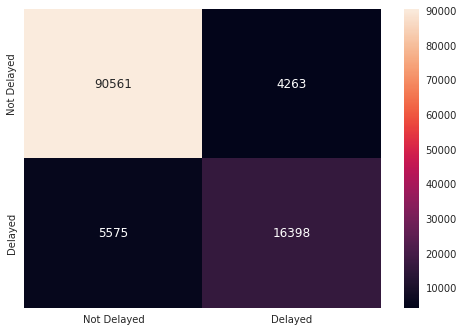

In [152]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm,annot=True,fmt='d',xticklabels=labels_,yticklabels=labels_)

In [153]:
cv = StratifiedKFold(n_splits=3, shuffle=True)
result = cross_val_score(rfc,X_train,y_train, cv=cv, scoring='roc_auc', n_jobs=-1)
print(np.mean(result))

0.8660186628487513


In [154]:
print(classification_report(y_test, y_pred, digits=4))

              precision    recall  f1-score   support

         0.0     0.9420    0.9550    0.9485     94824
         1.0     0.7937    0.7463    0.7692     21973

    accuracy                         0.9158    116797
   macro avg     0.8678    0.8507    0.8589    116797
weighted avg     0.9141    0.9158    0.9148    116797



## Neural Networks

In [155]:
from keras.models import Sequential
from keras.layers import Dense
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder()

In [156]:
label_encoder = LabelEncoder()
data=Jan2019.drop(columns=['ARR_DEL15'])
labels=Jan2019['ARR_DEL15']

In [157]:
object_col = ['OP_UNIQUE_CARRIER','DEP_TIME_BLK']
for col in object_col:
    data[col] = label_encoder.fit_transform(data[col])
    data[col] = label_encoder.fit_transform(data[col])

In [158]:
#Normalizing the data
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X = sc.fit_transform(data)
y_=Jan2019['ARR_DEL15'].values.reshape(-1,1)
y = ohe.fit_transform(y_).toarray()
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2,random_state = 42)

In [159]:
model = Sequential([
    Dense(7, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(4, activation='relu'),
    Dense(2, activation='sigmoid'),
])

In [160]:
model.compile(optimizer='sgd',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [161]:
hist = model.fit(X_train, y_train,
          batch_size=128, epochs=6,
          validation_data=(X_test,y_test))


Epoch 1/6
3650/3650 [==============================] - 10s 2ms/step - loss: 0.4835 - accuracy: 0.8021 - val_loss: 0.4139 - val_accuracy: 0.8119
Epoch 2/6
3650/3650 [==============================] - 10s 3ms/step - loss: 0.3506 - accuracy: 0.8231 - val_loss: 0.3004 - val_accuracy: 0.9124
Epoch 3/6
3650/3650 [==============================] - 8s 2ms/step - loss: 0.2846 - accuracy: 0.9146 - val_loss: 0.2746 - val_accuracy: 0.9151
Epoch 4/6
3650/3650 [==============================] - 8s 2ms/step - loss: 0.2736 - accuracy: 0.9151 - val_loss: 0.2707 - val_accuracy: 0.9157
Epoch 5/6
3650/3650 [==============================] - 8s 2ms/step - loss: 0.2715 - accuracy: 0.9155 - val_loss: 0.2697 - val_accuracy: 0.9158
Epoch 6/6
3650/3650 [==============================] - 9s 2ms/step - loss: 0.2707 - accuracy: 0.9155 - val_loss: 0.2692 - val_accuracy: 0.9158


In [162]:
y_pred = model.predict(X_test)
#Converting predictions to label
pred = list()
for i in range(len(y_pred)):
    pred.append(np.argmax(y_pred[i]))

3650/3650 [==============================] - 5s 1ms/step


In [163]:
y_test = np.array(y_test)
y_test=np.where(y_test==1)[1]

In [164]:
print(classification_report(y_test, pred, digits=4))

              precision    recall  f1-score   support

           0     0.9421    0.9550    0.9485     94824
           1     0.7936    0.7466    0.7694     21973

    accuracy                         0.9158    116797
   macro avg     0.8678    0.8508    0.8589    116797
weighted avg     0.9141    0.9158    0.9148    116797



## Support Vector Machine

In [165]:
from sklearn.svm import SVC
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

label_encoder = LabelEncoder()
data=Jan2019.sample(20000)
X=data.drop(columns=['ARR_DEL15'])
y=data['ARR_DEL15']
object_col = ['OP_UNIQUE_CARRIER','DEP_TIME_BLK']
for col in object_col:
    X[col] = label_encoder.fit_transform(X[col])
    X[col] = label_encoder.fit_transform(X[col])

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state = 42)
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [166]:
from sklearn.svm import SVC
svm = SVC(kernel='linear')
svm.fit(X_train,y_train)

SVC(kernel='linear')

In [167]:
y_pred = svm.predict(X_test)

In [168]:
acc = accuracy_score(y_test,y_pred)
acc

0.915

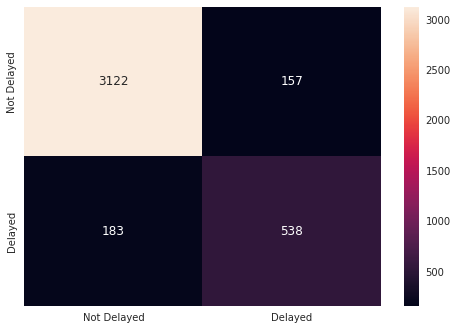

In [169]:
labels_=['Not Delayed','Delayed']
cm = confusion_matrix(y_test,y_pred)
sns.heatmap(cm,annot=True,fmt='d',xticklabels=labels_,yticklabels=labels_)

In [170]:
cv = StratifiedKFold(n_splits=3, shuffle=True)
result = cross_val_score(svm,X_train,y_train, cv=cv, scoring='roc_auc', n_jobs=-1)
print(np.mean(result))

0.8419945918733595


In [171]:
print(classification_report(y_test, y_pred, digits=4))

              precision    recall  f1-score   support

         0.0     0.9446    0.9521    0.9484      3279
         1.0     0.7741    0.7462    0.7599       721

    accuracy                         0.9150      4000
   macro avg     0.8594    0.8492    0.8541      4000
weighted avg     0.9139    0.9150    0.9144      4000



Tuning Hyperparameters that is chaging the kernel





In [172]:
from sklearn.svm import SVC
svm = SVC(kernel='rbf')
svm.fit(X_train,y_train)

SVC()

In [173]:
y_pred = svm.predict(X_test)

In [174]:
acc = accuracy_score(y_test,y_pred)
acc

0.915

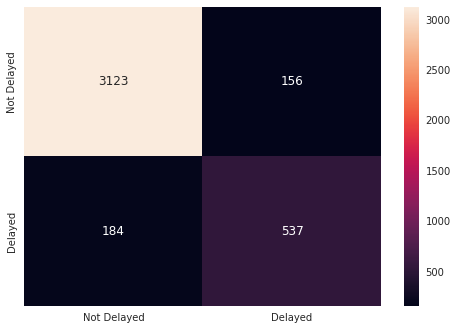

In [175]:
labels_=['Not Delayed','Delayed']
cm = confusion_matrix(y_test,y_pred)
sns.heatmap(cm,annot=True,fmt='d',xticklabels=labels_,yticklabels=labels_)

In [176]:
cv = StratifiedKFold(n_splits=3, shuffle=True)
result = cross_val_score(svm,X_train,y_train, cv=cv, scoring='roc_auc', n_jobs=-1)
print(np.mean(result))

0.8829735904351503


In [177]:
print(classification_report(y_test, y_pred, digits=4))

              precision    recall  f1-score   support

         0.0     0.9444    0.9524    0.9484      3279
         1.0     0.7749    0.7448    0.7595       721

    accuracy                         0.9150      4000
   macro avg     0.8596    0.8486    0.8540      4000
weighted avg     0.9138    0.9150    0.9143      4000

